## Observations and Insights

1. The sex distribution of the mouse is relatively even.
2. For the mice who has ID as s158, it was implemented the Capomulin treatment. Then its tumor volume decreases as the timepoint increases.
3. For the mouse who was implemented Capomulin treatment, weight and tumor volume has a strong positive correlation, which means when a mice's weight increase, it is most likely that its tumor volume would increase.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_list=[]
median_list=[]
var_list=[]
std_list=[]
sem_list=[]

for each in df['Drug Regimen'].unique():
    df_mean=round(df[df['Drug Regimen']==each]['Tumor Volume (mm3)'].mean(),2)
    mean_list.append(df_mean)
    df_median=round(df[df['Drug Regimen']==each]['Tumor Volume (mm3)'].median(),2)
    median_list.append(df_median)
    df_var=round(df[df['Drug Regimen']==each]['Tumor Volume (mm3)'].var(),2)
    var_list.append(df_var)
    df_std=round(df[df['Drug Regimen']==each]['Tumor Volume (mm3)'].std(),2)
    std_list.append(df_std)
    df_sem=round(df[df['Drug Regimen']==each]['Tumor Volume (mm3)'].sem(),2)
    sem_list.append(df_sem)


summary_table=pd.DataFrame({"Mean":mean_list, "Median": median_list, "Variance": var_list,
                           "Standard Deviation": std_list, "SEM":sem_list})
summary_table=summary_table.transpose()
summary_table.columns=list(df['Drug Regimen'].unique())
summary_table

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
Mean,40.22,40.68,52.88,54.03,52.59,54.23,53.24,55.24,52.32,54.33
Median,40.67,41.56,51.82,52.29,51.78,52.43,51.82,53.70,50.85,52.51
Variance,23.49,24.95,43.13,61.17,39.29,59.45,48.53,68.55,42.35,66.17
Standard Deviation,4.85,4.99,6.57,7.82,6.27,7.71,6.97,8.28,6.51,8.13
SEM,0.32,0.33,0.49,0.58,0.47,0.57,0.52,0.60,0.51,0.60


## Bar plots

<IPython.core.display.Javascript object>


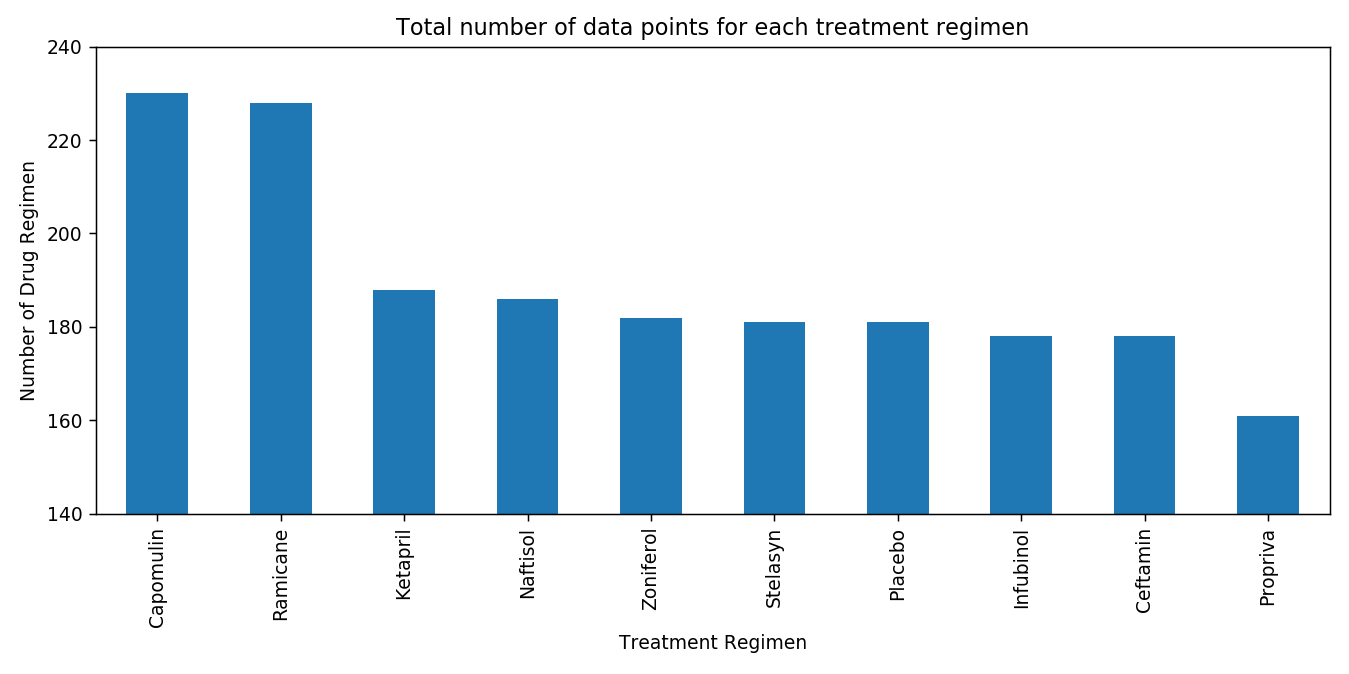

In [3]:
Drug_Regimen_df=df.groupby('Drug Regimen').count()['Mouse ID'].sort_values(ascending=False).to_frame()

Drug_chart=Drug_Regimen_df.plot(kind="bar", figsize=(10,5), ylim=(140,240),legend=False,
                                title="Total number of data points for each treatment regimen")
# Set the xlabel and ylabel using class methods
Drug_chart.set_xlabel("Treatment Regimen")
Drug_chart.set_ylabel("Number of Drug Regimen")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


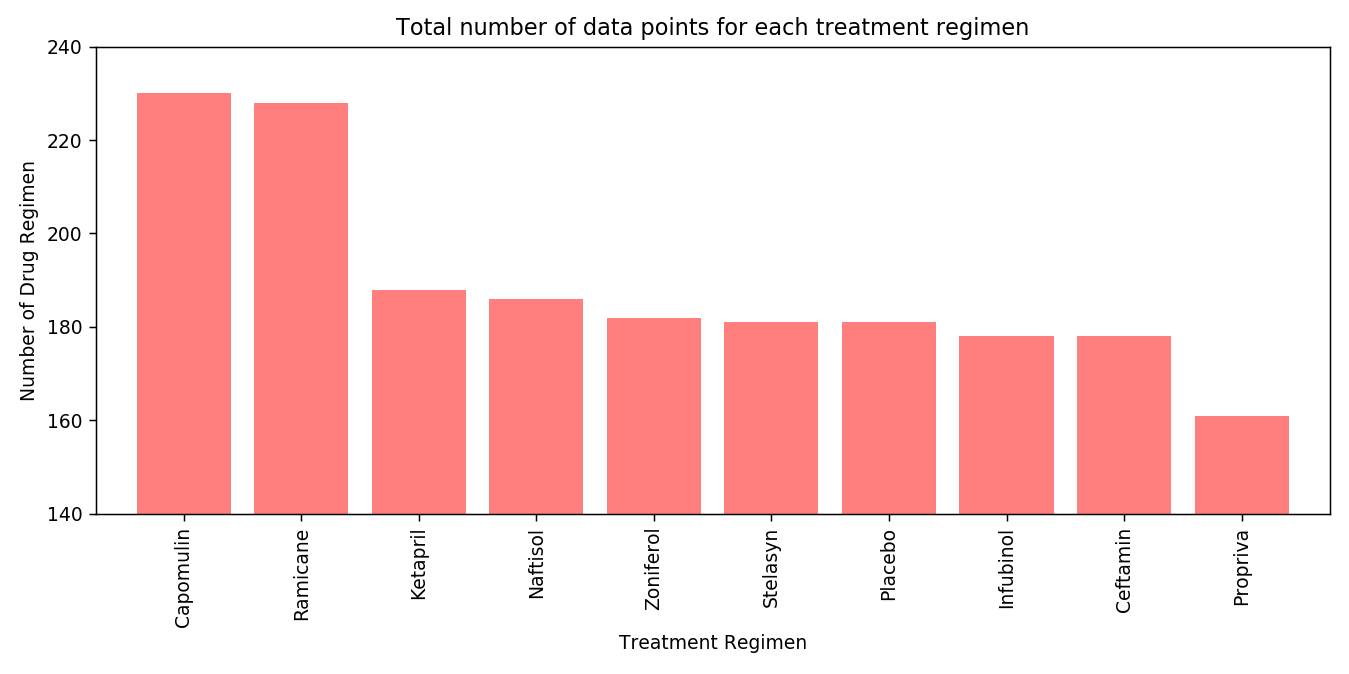

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(Drug_Regimen_df))
tick_locations = [value for value in x_axis]

#plotting
plt.figure(figsize=(10,5))
plt.bar(x_axis, Drug_Regimen_df['Mouse ID'], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, Drug_Regimen_df.index, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(140, Drug_Regimen_df['Mouse ID'].max()+10)
plt.title("Total number of data points for each treatment regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Drug Regimen")
plt.show()
plt.tight_layout()

## Pie plots

<IPython.core.display.Javascript object>


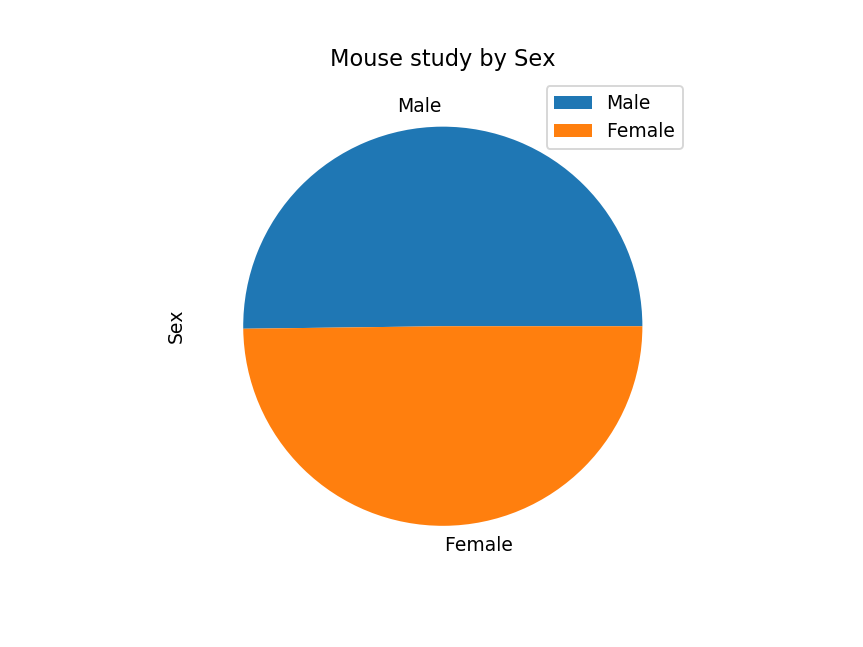

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#create a df
sex_df=df[['Mouse ID','Sex']].drop_duplicates()['Sex'].value_counts().to_frame()

#extract index(which is male and female)
sex_list = sex_df.keys()

# Create a pie chart based on sex
sex_pie = sex_df.plot(kind="pie", y=sex_list,  title="Mouse study by Sex")

<IPython.core.display.Javascript object>


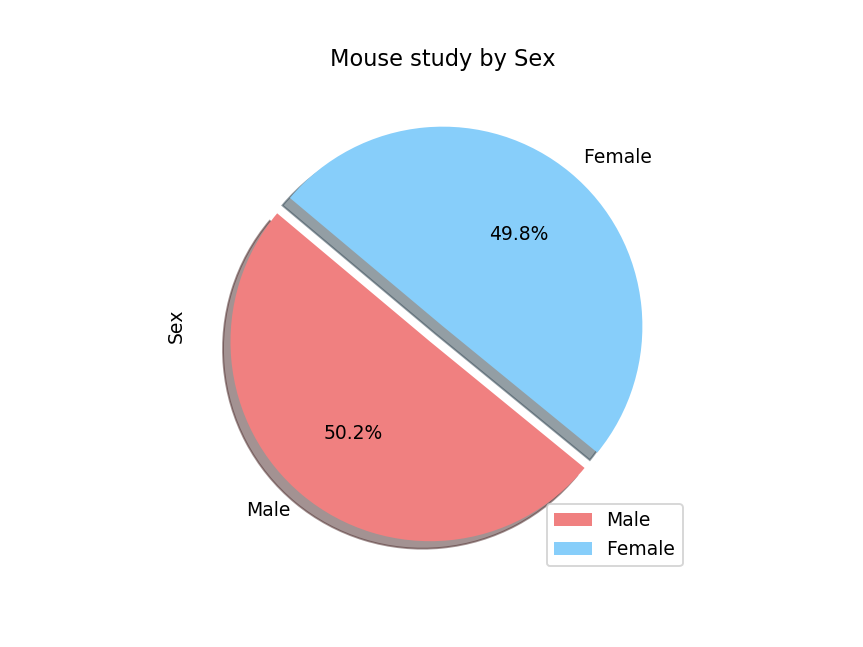

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

#plotting a pie chart
plt.pie(sex_df['Sex'], explode=explode, labels=sex_df.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Mouse study by Sex")
plt.ylabel("Sex")
plt.legend(loc='lower right')

plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
new_df=df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

#extract the final tumor volume of each mouse
final_mouse_df=pd.DataFrame(columns=['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)'])
row_count=0
for i, row in new_df.loc[1:len(df),].iterrows():
    if new_df.loc[i-1]['Mouse ID'] != new_df.loc[i]['Mouse ID']:
        final_mouse_df.loc[row_count]=new_df.loc[i-1]
        row_count+=1
#add the last mouse
final_mouse_df.loc[len(final_mouse_df)]=new_df.loc[len(new_df)-1]



#Capomulin df
Capomulin_df=final_mouse_df[final_mouse_df['Drug Regimen']=="Capomulin"]
#Ramicane df
Ramicane_df=final_mouse_df[final_mouse_df['Drug Regimen']=="Ramicane"]
#Infubinol df
Infubinol_df=final_mouse_df[final_mouse_df['Drug Regimen']=="Infubinol"]
#Ceftamin df
Ceftamin_df=final_mouse_df[final_mouse_df['Drug Regimen']=="Ceftamin"]


#Finding outliers
#in Capomulin df
Capomulin_df_quartiles = Capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Capomulin_df_quartiles[0.25]
upperq = Capomulin_df_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2) 
outlier=Capomulin_df[(Capomulin_df['Tumor Volume (mm3)'] < lower_bound) | (Capomulin_df['Tumor Volume (mm3)'] > upper_bound)]
number_of_outliers=len(outlier)
if number_of_outliers>0:
    print(f"There are {number_of_outliers} outliers in the Capomulin treatment regimen, which are \n {outlier} \n")
else:
    print(f"There are no outliers in the Capomulin treatment regimen.")



#in Ramicane df
Ramicane_df_quartiles = Ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Ramicane_df_quartiles[0.25]
upperq = Ramicane_df_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
outlier=Ramicane_df[(Ramicane_df['Tumor Volume (mm3)'] < lower_bound) | (Ramicane_df['Tumor Volume (mm3)'] > upper_bound)]
number_of_outliers=len(outlier)
if number_of_outliers>0:
    print(f"There are {number_of_outliers} outliers in the Ramicane treatment regimen, which are \n {outlier} \n")
else:
    print(f"There are no outliers in the Ramicane treatment regimen.")



#in Infubinol df
Infubinol_df_quartiles = Infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Infubinol_df_quartiles[0.25]
upperq = Infubinol_df_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
outlier=Infubinol_df[(Infubinol_df['Tumor Volume (mm3)'] < lower_bound) | (Infubinol_df['Tumor Volume (mm3)'] > upper_bound)]
number_of_outliers=len(outlier)
if number_of_outliers>0:
    print(f"There are {number_of_outliers} outliers in the Infubinol treatment regimen, which are \n {outlier}\n")
else:
    print(f"There are no outliers in the Infubinol treatment regimen.\n")



#Ceftamin df
Ceftamin_df_quartiles = Ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Ceftamin_df_quartiles[0.25]
upperq = Ceftamin_df_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
outlier=Ceftamin_df[(Ceftamin_df['Tumor Volume (mm3)'] < lower_bound) | (Ceftamin_df['Tumor Volume (mm3)'] > upper_bound)]
number_of_outliers=len(outlier)
if number_of_outliers>0:
    print(f"There are {number_of_outliers} outliers in the Ceftamin treatment regimen, which are \n {outlier} ")
else:
    print(f"There are no outliers in the Ceftamin treatment regimen.")



There are no outliers in the Capomulin treatment regimen.
There are no outliers in the Ramicane treatment regimen.
There are 1 outliers in the Infubinol treatment regimen, which are 
    Mouse ID Drug Regimen  Tumor Volume (mm3)
74     c326    Infubinol           36.321346

There are no outliers in the Ceftamin treatment regimen.


<IPython.core.display.Javascript object>


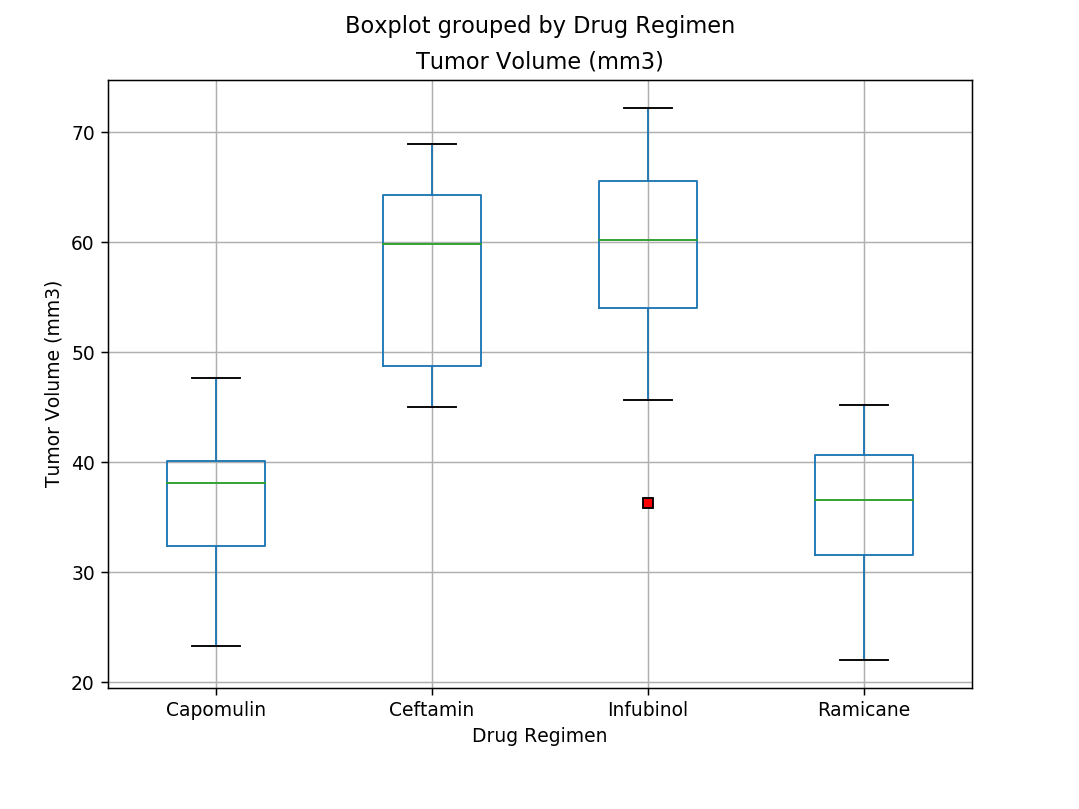

In [8]:
# Generate a box plot of the final final tumor volume of each mouse across four regimens of interest
filter_df=final_mouse_df[(final_mouse_df['Drug Regimen']=="Capomulin") | (final_mouse_df['Drug Regimen']=="Ramicane") | 
            (final_mouse_df['Drug Regimen']=="Infubinol") | (final_mouse_df['Drug Regimen']=="Ceftamin")]
fig, ax = plt.subplots(figsize=(8,6))
red_square = dict(markerfacecolor='r', marker='s', markersize=5)
box_plot = filter_df.boxplot(ax=ax, column = 'Tumor Volume (mm3)', by = 'Drug Regimen', flierprops=red_square)
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

<IPython.core.display.Javascript object>


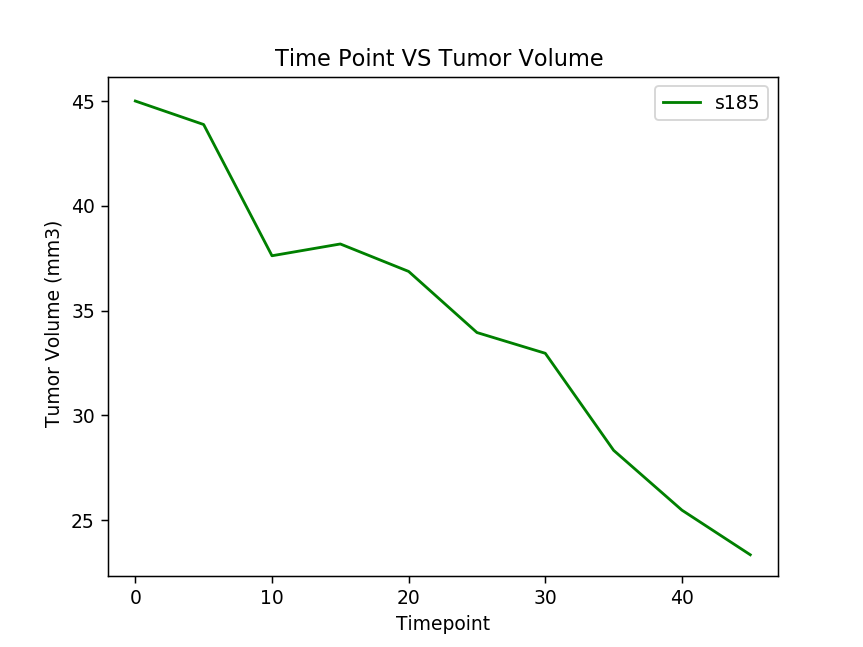

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
new_Capomulin_df=df[df['Drug Regimen']=='Capomulin'].set_index('Mouse ID')
plt.plot(new_Capomulin_df.loc['s185','Timepoint'], new_Capomulin_df.loc['s185','Tumor Volume (mm3)'], color="green")
plt.legend(['s185'], loc="best")
plt.xlabel("Timepoint")
plt.ylabel(" Tumor Volume (mm3)")
plt.title("Time Point VS Tumor Volume ")
plt.xlim(min(new_Capomulin_df['Timepoint'])-2, max(new_Capomulin_df['Timepoint'])+2)
plt.ylim(min(new_Capomulin_df['Tumor Volume (mm3)'])-1, max(new_Capomulin_df['Tumor Volume (mm3)'])-2)
plt.show()

<IPython.core.display.Javascript object>


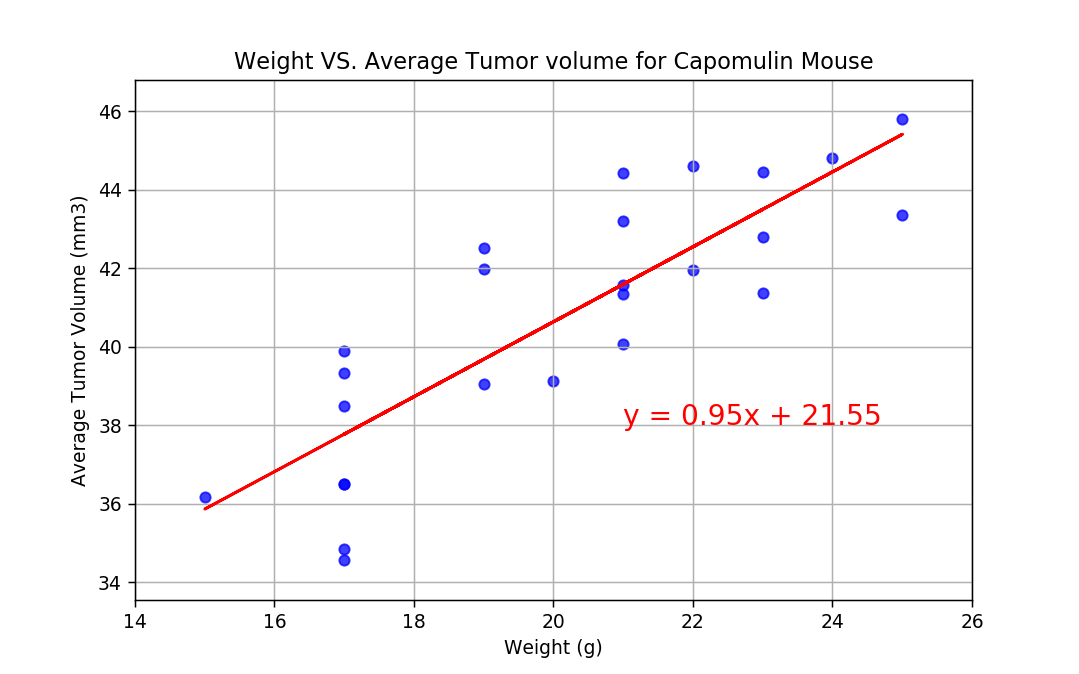

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_drug_df=df[["Mouse ID","Drug Regimen","Weight (g)","Tumor Volume (mm3)"]]
avg_Capomulin_df=weight_drug_df[weight_drug_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean().reset_index()

# Create a scatter plot which compares MPG to horsepower
plt.figure(figsize=(8,5))
scatter=plt.scatter(avg_Capomulin_df["Weight (g)"],avg_Capomulin_df["Tumor Volume (mm3)"], marker="o", 
            facecolors="blue", s=30, alpha=0.75)
plt.xlim(min(avg_Capomulin_df["Weight (g)"])-1, max(avg_Capomulin_df["Weight (g)"])+1)
plt.ylim(min(avg_Capomulin_df["Tumor Volume (mm3)"]-1), max(avg_Capomulin_df["Tumor Volume (mm3)"])+1)
plt.title("Weight VS. Average Tumor volume for Capomulin Mouse")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
plt.show()

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient first
print(f"The correlation coefficient between Weight and Average Tumor Volume is \
{round(st.pearsonr(avg_Capomulin_df['Weight (g)'],avg_Capomulin_df['Tumor Volume (mm3)'])[0], 2)}")

#compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_Capomulin_df['Weight (g)'], avg_Capomulin_df['Tumor Volume (mm3)'])
regress_values = avg_Capomulin_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#draw a linear regression line
linear_regression=plt.plot(avg_Capomulin_df['Weight (g)'], regress_values, "r-")
plt.annotate(line_eq, (21,38), fontsize=15, color="red")
plt.show()

The correlation coefficient between Weight and Average Tumor Volume is 0.84
